#### Project Three 

Univariate analysis (12 marks)
a. Univariate analysis – data types and description of the independent attributes
which should include (name, meaning, range of values observed, central values
(mean and median), standard deviation and quartiles, analysis of the body of
distributions / tails, missing values, outliers.
b. Strategies to address the different data challenges such as data pollution, outlier’s
treatment and missing values treatment.
c. Please provide comments in jupyter notebook regarding the steps you take and
insights drawn from the plots.
2. Multivariate analysis (8 marks)
a. Bi-variate analysis between the predictor variables and target column. Comment
on your findings in terms of their relationship and degree of relation if any.
Visualize the analysis using boxplots and pair plots, histograms or density curves.
Select the most appropriate attributes.
b. Please provide comments in jupyter notebook regarding the steps you take and
insights drawn from the plots

#### Data Description
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Attribute information
Input variables:
Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account
Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*
Other attributes:
13. campaign: number of contacts performed during this campaign and for this
client
14. pdays: number of days that passed by after the client was last contacted from a
previous campaign (-1 tells us the person has not been contacted or contact
period is beyond 900 days)
15. previous: number of times the client has been contacted before for the last
campaign to subscribe term deposit
16. poutcome: outcome of the previous marketing campaign
Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

In [204]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 0.23.1.


In [205]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, roc_auc_score
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import graphviz

In [206]:
dfbank = pd.read_csv('bank.csv',delimiter = ';',header='infer')
print(dfbank.shape)
print(dfbank.columns)
dfbank.head()

(4521, 17)
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Univariate analysis 

In [207]:
dfbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [208]:
dfbank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


pdays and previous are skewed data so need to scale the data in case of logistic regression 

In [209]:
dfbank.nunique() # Number of unique values in a column

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

**Observations**
Following variables Categorical variables : Job , Marital , Education , default , housing , loan , contact , poutcome and y 

In [210]:
dfbank["poutcome"].value_counts() 

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

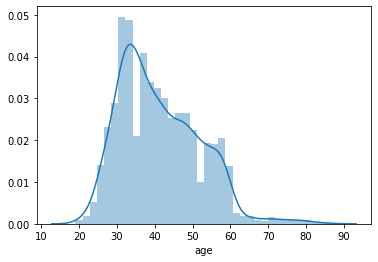

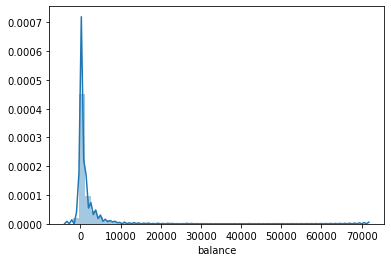

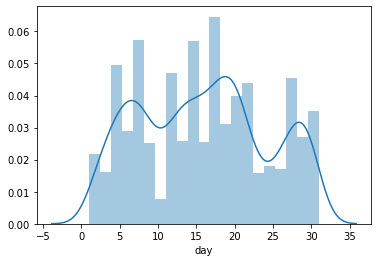

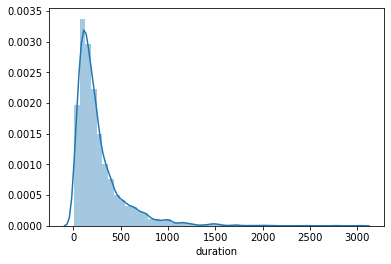

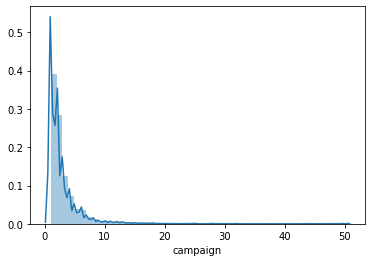

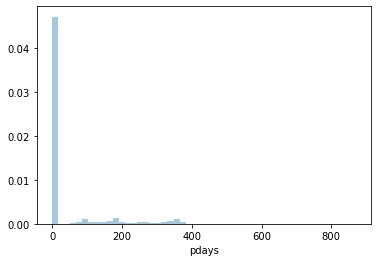

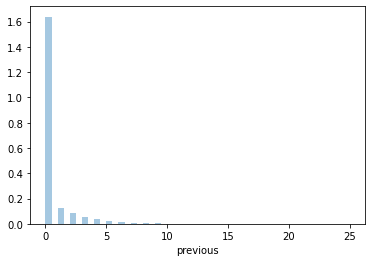

In [120]:
# distplot for continous columns
for i in ['age','balance','day','duration','campaign','pdays','previous']:
    sns.distplot(dfbank[i])
    plt.show()

**Analysing the current target variable distribution **

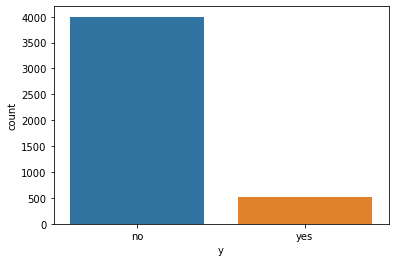

In [121]:
sns.countplot('y',data=dfbank)

In [122]:
dfbank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

** No null values **

##  Bivariate Analysis

In [123]:
dfbank.groupby(["y"]).mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
yes,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


In [124]:
dfbank.groupby(["y"]).median()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,39.0,419.5,16.0,167.0,2.0,-1.0,0.0
yes,40.0,710.0,15.0,442.0,2.0,-1.0,0.0


In [125]:
pd.crosstab(dfbank['day'],dfbank['y'],normalize='columns')

y,no,yes
day,,
1,0.00425,0.019194
2,0.02500,0.026871
3,0.02325,0.023033
4,0.03125,0.026871
5,0.03825,0.053743
6,0.04325,0.026871
7,0.04425,0.024952
8,0.04150,0.026871
9,0.03675,0.030710


In [126]:
pd.crosstab(dfbank['month'],dfbank['y'],normalize='columns')

y,no,yes
month,,
apr,0.05925,0.107486
aug,0.13850,0.151631
dec,0.00275,0.017274
feb,0.04600,0.072937
jan,0.03300,0.030710
jul,0.16125,0.117083
jun,0.11900,0.105566
mar,0.00700,0.040307
may,0.32625,0.178503


## No major impact on  or relation to dependent variable 'y' due to month and day so the columns can be dropped 

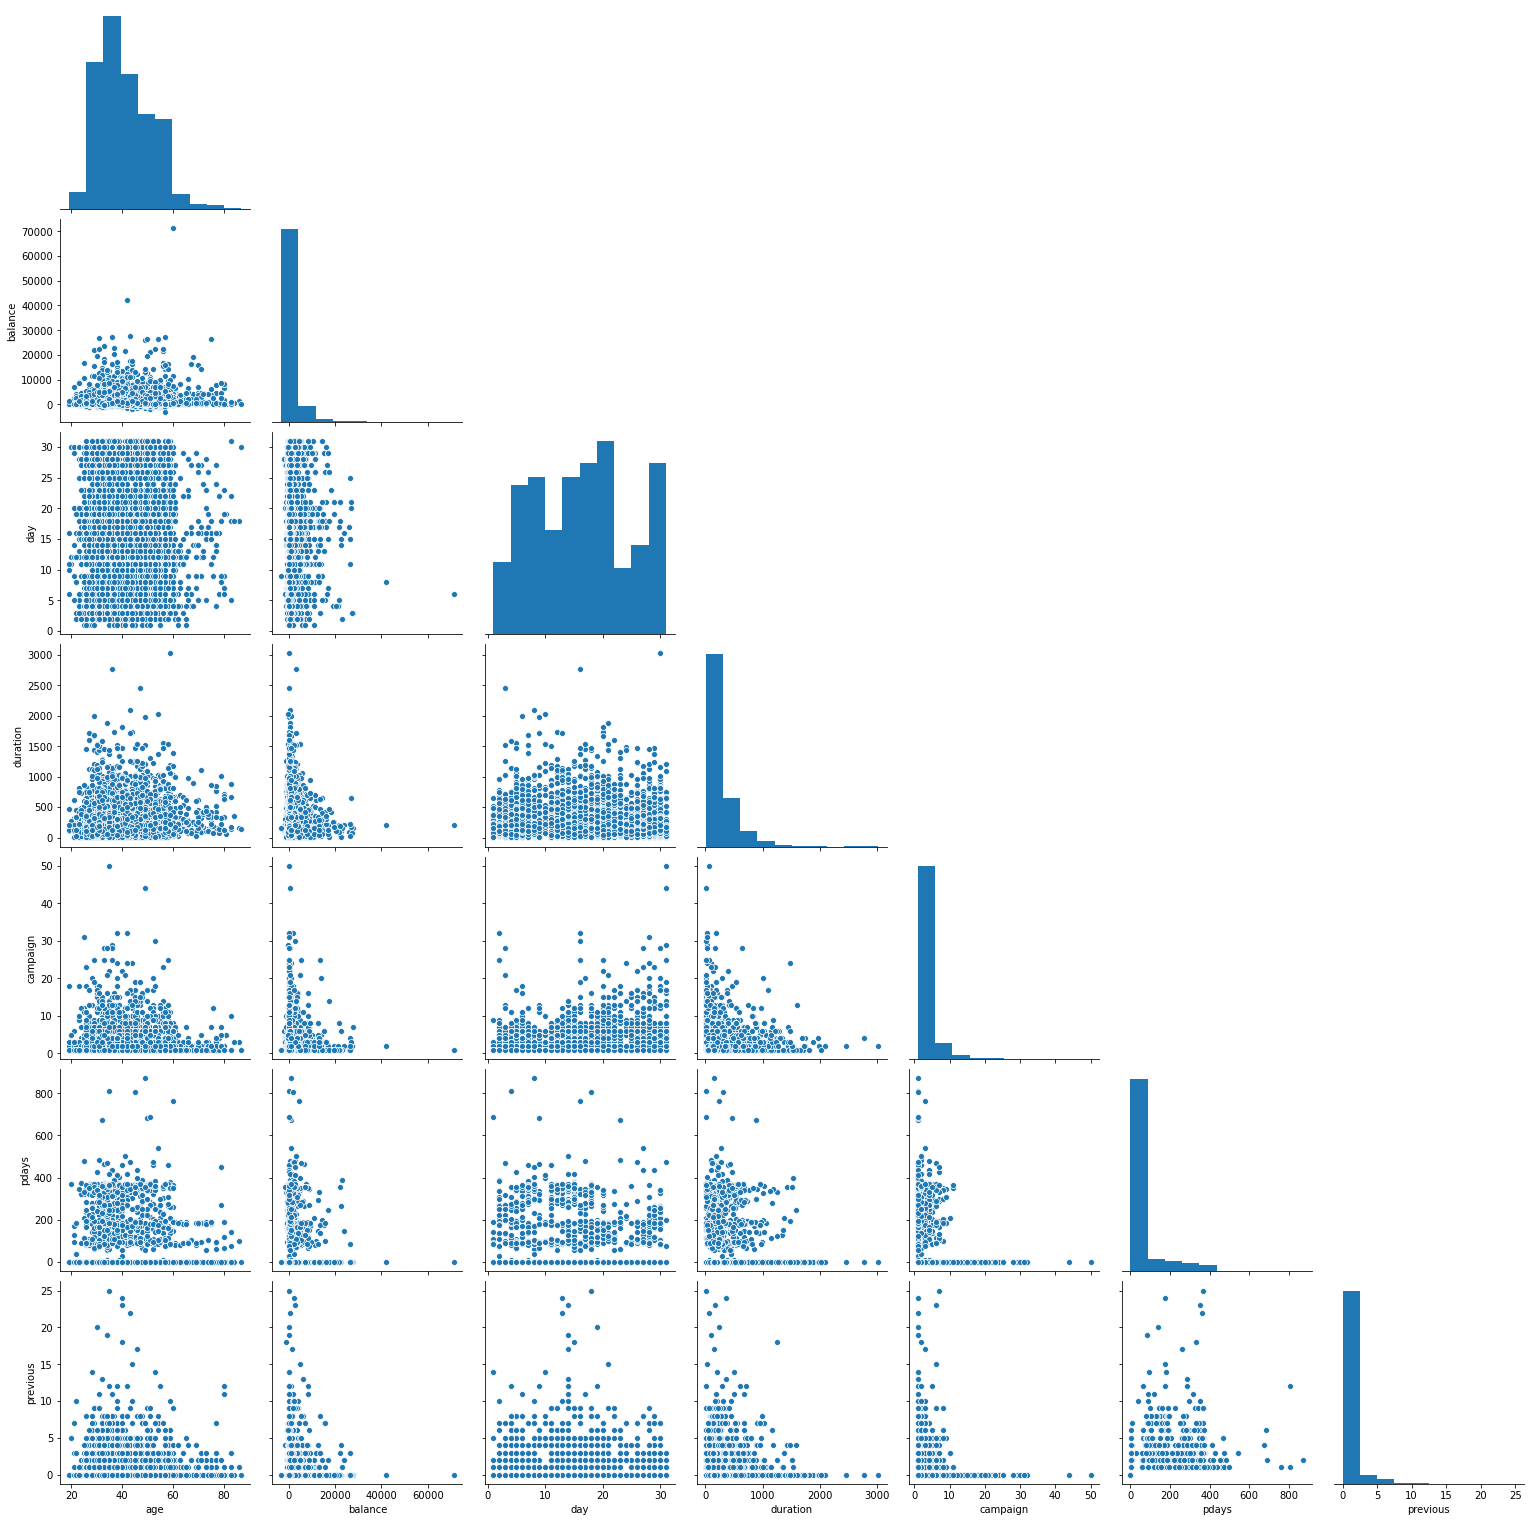

In [127]:
sns.pairplot(dfbank, height=3, diag_kind='auto', corner=True)
plt.show()

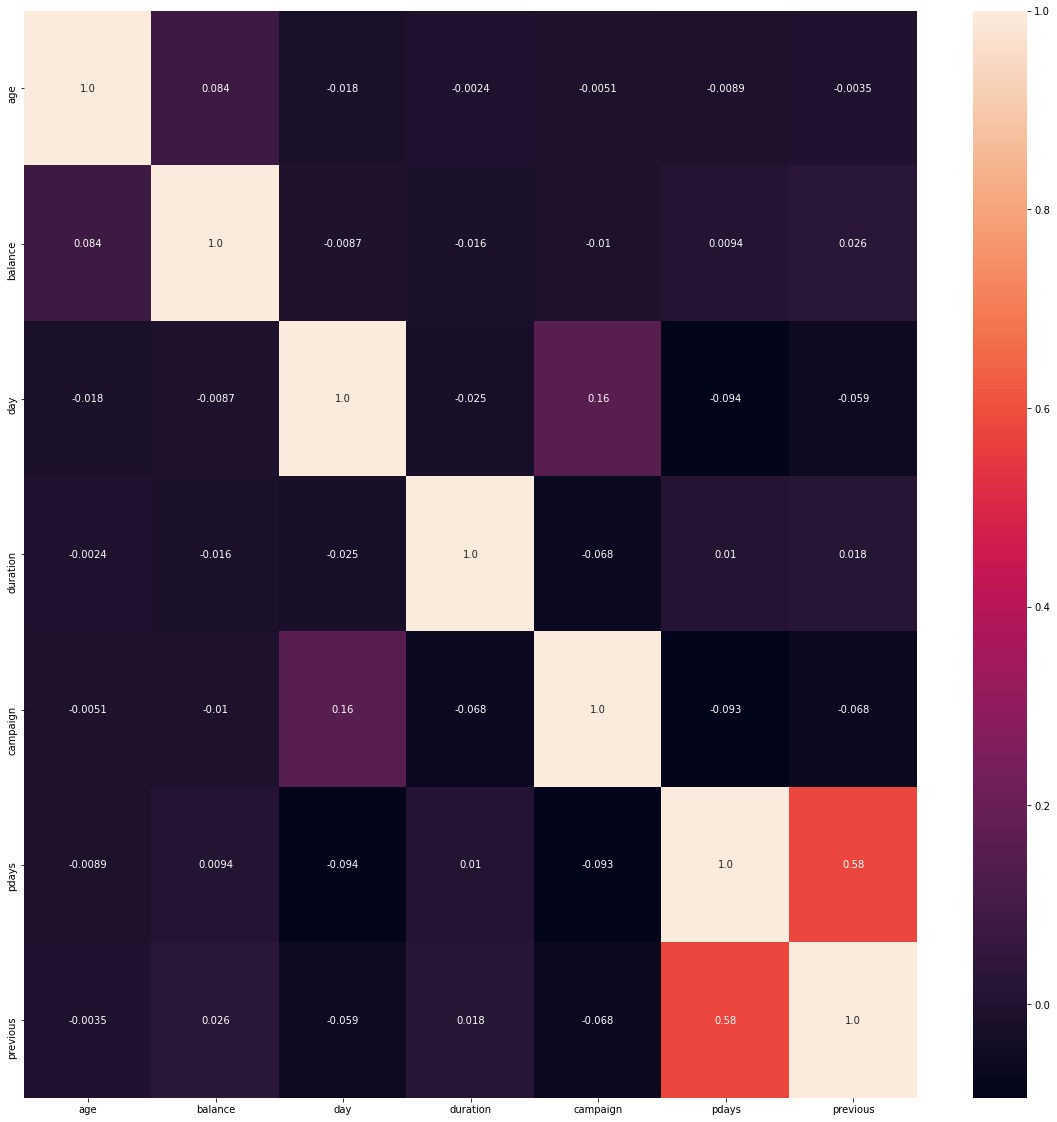

In [128]:
plt.figure(figsize=(20,20))
sns.heatmap(dfbank.corr(), annot=True, fmt=".2")
plt.show()

**No major correlation between variable except pdays and previous but still the correlation is less than 0.6 so can be retained 

## prepare the data for analysis 

** Converting the categorical variables to category from object 

In [285]:
dfbankmod=dfbank.astype({'job': 'category','marital': 'category','education': 'category','default': 'category','default': 'category','housing': 'category','loan': 'category','contact': 'category','campaign': 'category','poutcome': 'category','y': 'category'})
dfbankmod.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month          object
duration        int64
campaign     category
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object

In [286]:
# dropping month and day as found in bivariate analysis they dont have much impact on outcome 
dfbankmod = dfbankmod.drop('month', axis =1 ) # dropping month column
dfbankmod = dfbankmod.drop('day', axis =1 ) # dropping day column

**binning the pdays variable and converting to categorical variable

In [287]:
# Binning
bin_edges = [-2,1,50,100,150,200,250,300,900]       
bin_labels = ['0', '1-50','50-100','100-150','150-200','200-250',
              '250-300','300+']               
dfbankmod['pdays'] = pd.cut(dfbankmod['pdays'], bins=bin_edges , labels=bin_labels)


In [288]:
dfbankmod.head(100)
dfbankmod=dfbankmod.astype({'pdays': 'category'})

dfbankmod['pdays'] = dfbankmod['pdays'].cat.codes
dfbankmod['pdays'].unique()

array([0, 7, 4, 3, 5, 1, 2, 6], dtype=int8)

In [289]:
dfbankmod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        4521 non-null   int64   
 1   job        4521 non-null   category
 2   marital    4521 non-null   category
 3   education  4521 non-null   category
 4   default    4521 non-null   category
 5   balance    4521 non-null   int64   
 6   housing    4521 non-null   category
 7   loan       4521 non-null   category
 8   contact    4521 non-null   category
 9   duration   4521 non-null   int64   
 10  campaign   4521 non-null   category
 11  pdays      4521 non-null   int8    
 12  previous   4521 non-null   int64   
 13  poutcome   4521 non-null   category
 14  y          4521 non-null   category
dtypes: category(10), int64(4), int8(1)
memory usage: 192.8 KB


In [290]:
dfbankmod = pd.get_dummies(dfbankmod, drop_first=True)


In [291]:
dfbankmod.head(100)

,age,balance,duration,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,campaign_29,campaign_30,campaign_31,campaign_32,campaign_44,campaign_50,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,79,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,33,4789,220,7,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,35,1350,185,7,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,199,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,59,0,226,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,41,1567,291,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
96,41,5426,149,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
97,30,261,233,3,20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,36,2843,473,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [292]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(dfbankmod.drop('y_yes',axis=1), dfbankmod['y_yes'], test_size=.25,
                                                   random_state=22)
X_train.shape,X_test.shape

((3390, 60), (1131, 60))

In [293]:
y_train.shape,y_test.shape

((3390,), (1131,))

## Logistic regression

In [294]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=7)
logreg.fit(X_train, y_train)                    # fit the model on train data

LogisticRegression(random_state=7)

In [295]:
y_predict = logreg.predict(X_test)              # Predicting the target variable on test data

In [296]:
# Observe the predicted and observed classes in a dataframe.

z = X_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z.head()

,age,balance,duration,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,campaign_30,campaign_31,campaign_32,campaign_44,campaign_50,poutcome_other,poutcome_success,poutcome_unknown,Observed Loan Status,Predicted Loan Status
2265,45,1929,44,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3992,41,1287,286,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4503,60,362,816,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3724,37,1040,199,4,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3388,49,66,59,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [297]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [298]:
acc_logreg = logreg.score(X_test, y_test)

In [299]:
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy': acc_logreg,'recall': recall_score(y_test,y_predict),'precision': precision_score(y_test,y_predict),'f1': f1_score(y_test,y_predict),'ROC': roc_auc_score(y_test,y_predict)})
resultsDf = resultsDf[['Method', 'accuracy','recall','precision','f1','ROC']]
resultsDf

,Method,accuracy,recall,precision,f1,ROC
0,Logistic Regression,0.907162,0.208696,0.631579,0.313725,0.597458


Trainig accuracy 0.8884955752212389

Testing accuracy 0.9071618037135278

Confusion Matrix


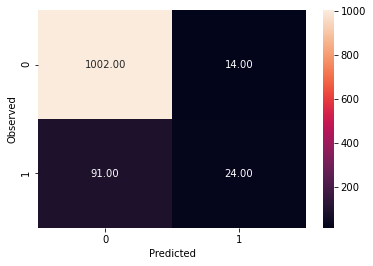

None

Recall: 0.20869565217391303

Precision: 0.631578947368421

F1 Score: 0.31372549019607837

Roc Auc Score: 0.5974580623074289


In [300]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

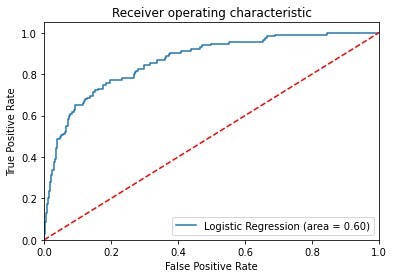

In [301]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [302]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
59,poutcome_unknown,0.96
22,housing_yes,0.96
25,contact_unknown,0.75
58,poutcome_success,0.57
18,education_secondary,0.46
5,job_blue-collar,0.46
16,marital_married,0.44
17,marital_single,0.41
23,loan_yes,0.38
9,job_retired,0.37


## Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.

In [303]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns.Repeat with hyper parameter tunning limiting the depth

model_entropy=DecisionTreeClassifier(criterion='entropy')

In [304]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

#### Print the accuracy of the model & print the confusion matrix

In [305]:
model_entropy.score(X_train, y_train)  # performance on train data

1.0

In [306]:
model_entropy.score(X_test, y_test)  # performance on test data

0.8620689655172413

In [307]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [308]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [309]:
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

0.9168877099911583
0.8988200589970502


In [310]:
acc_DT = accuracy_score(y_test,preds_pruned)
acc_DT

0.9168877099911583

In [311]:
dfbankmod.head()

,age,balance,duration,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,campaign_29,campaign_30,campaign_31,campaign_32,campaign_44,campaign_50,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,79,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,33,4789,220,7,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,35,1350,185,7,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,199,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,59,0,226,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [312]:
## Calculating feature importance
xvar = dfbankmod.drop('y_yes', axis=1)
feature_cols = xvar.columns 
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration,0.687443
poutcome_success,0.298103
marital_married,0.014454
campaign_15,0.000000
campaign_20,0.000000
campaign_19,0.000000
campaign_18,0.000000
campaign_17,0.000000
campaign_16,0.000000
age,0.000000


In [313]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT,'recall': recall_score(y_test,preds_pruned),'precision': precision_score(y_test,preds_pruned),'f1': f1_score(y_test,preds_pruned),'ROC': roc_auc_score(y_test,preds_pruned)})
resultsDf=pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','recall','precision','f1','ROC']]
resultsDf

,Method,accuracy,recall,precision,f1,ROC
0,Logistic Regression,0.907162,0.208696,0.631579,0.313725,0.597458
0,Decision Tree,0.916888,0.330435,0.690909,0.447059,0.656851


In [314]:
y_predict = clf_pruned.predict(X_test) 

Confusion Matrix


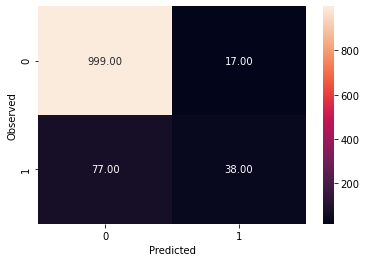

None

Recall: 0.33043478260869563

Precision: 0.6909090909090909

F1 Score: 0.4470588235294118

Roc Auc Score: 0.6568512495720643


In [315]:
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

### Apply Bagging Classifier Algorithm and print the accuracy.


In [316]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators = 50, max_samples = 0.7, bootstrap=True, oob_score=True, random_state=100)
bgcl = bgcl.fit(X_train, y_train)

In [317]:
bgcl.oob_score_

0.8908554572271387

In [318]:
bgcl.score(X_train, y_train) ## training accuracy

0.9858407079646018

In [319]:
bgcl.score(X_test, y_test) ## test accuracy

0.9115826702033598

In [320]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

In [321]:
acc_BG

0.9115826702033598

In [322]:
tempResultsDf = pd.DataFrame({'Method':['Bagging  Classifier'], 'accuracy': acc_BG,'recall': recall_score(y_test,pred_BG),'precision': precision_score(y_test,pred_BG),'f1': f1_score(y_test,pred_BG),'ROC': roc_auc_score(y_test,pred_BG)})
resultsDf=pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','recall','precision','f1','ROC']]
resultsDf

,Method,accuracy,recall,precision,f1,ROC
0,Logistic Regression,0.907162,0.208696,0.631579,0.313725,0.597458
0,Decision Tree,0.916888,0.330435,0.690909,0.447059,0.656851
0,Bagging Classifier,0.911583,0.365217,0.608696,0.456522,0.669321


Confusion Matrix


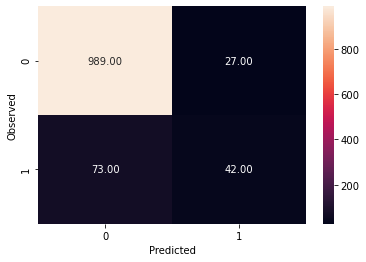

None

Recall: 0.3652173913043478

Precision: 0.6086956521739131

F1 Score: 0.4565217391304348

Roc Auc Score: 0.6693212940773708


In [323]:
print('Confusion Matrix')
print(draw_cm(y_test,pred_BG))
print()
print("Recall:",recall_score(y_test,pred_BG))
print()
print("Precision:",precision_score(y_test,pred_BG))
print()
print("F1 Score:",f1_score(y_test,pred_BG))
print()
print("Roc Auc Score:",roc_auc_score(y_test,pred_BG))

## Extra tree classifier

In [324]:
from sklearn.ensemble import ExtraTreesClassifier
erfcl = ExtraTreesClassifier(n_estimators = 200, max_depth=8,random_state=100)
erfcl = erfcl.fit(X_train, y_train)

In [325]:
pred_ET = erfcl.predict(X_test)
acc_ET = accuracy_score(y_test, pred_ET)

In [326]:
erfcl.score(X_train, y_train)

0.8991150442477877

In [327]:
erfcl.score(X_test, y_test)

0.9089301503094607

In [328]:
tempResultsDf = pd.DataFrame({'Method':['Extra tree classifier'], 'accuracy': acc_ET,'recall': recall_score(y_test,pred_ET),'precision': precision_score(y_test,pred_ET),'f1': f1_score(y_test,pred_ET),'ROC': roc_auc_score(y_test,pred_ET)})
resultsDf=pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','recall','precision','f1','ROC']]
resultsDf

,Method,accuracy,recall,precision,f1,ROC
0,Logistic Regression,0.907162,0.208696,0.631579,0.313725,0.597458
0,Decision Tree,0.916888,0.330435,0.690909,0.447059,0.656851
0,Bagging Classifier,0.911583,0.365217,0.608696,0.456522,0.669321
0,Extra tree classifier,0.908930,0.130435,0.833333,0.225564,0.563741


Confusion Matrix


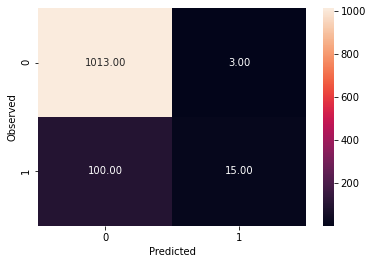

None

Recall: 0.13043478260869565

Precision: 0.8333333333333334

F1 Score: 0.22556390977443608

Roc Auc Score: 0.5637410133515919


In [329]:
print('Confusion Matrix')
print(draw_cm(y_test,pred_ET))
print()
print("Recall:",recall_score(y_test,pred_ET))
print()
print("Precision:",precision_score(y_test,pred_ET))
print()
print("F1 Score:",f1_score(y_test,pred_ET))
print()
print("Roc Auc Score:",roc_auc_score(y_test,pred_ET))

## Adaboost

In [330]:
from sklearn.ensemble import AdaBoostClassifier
## STAGEWISE ADDITIVE MODELING USING A MULTICLASS EXPONENTIAL LOSS FUNCTION
## R for Real
abcl = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                          n_estimators = 100, learning_rate=0.1, random_state=100, algorithm='SAMME.R')
abcl = abcl.fit(X_train, y_train)

In [331]:
abcl.score(X_train, y_train)

0.8920353982300885

In [332]:
abcl.score(X_test, y_test)

0.9089301503094607

In [333]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

In [334]:
tempResultsDf = pd.DataFrame({'Method':['AdaBoost'], 'accuracy': acc_AB,'recall': recall_score(y_test,pred_AB),'precision': precision_score(y_test,pred_AB),'f1': f1_score(y_test,pred_AB),'ROC': roc_auc_score(y_test,pred_AB)})
resultsDf=pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','recall','precision','f1','ROC']]
resultsDf

,Method,accuracy,recall,precision,f1,ROC
0,Logistic Regression,0.907162,0.208696,0.631579,0.313725,0.597458
0,Decision Tree,0.916888,0.330435,0.690909,0.447059,0.656851
0,Bagging Classifier,0.911583,0.365217,0.608696,0.456522,0.669321
0,Extra tree classifier,0.908930,0.130435,0.833333,0.225564,0.563741
0,AdaBoost,0.908930,0.208696,0.666667,0.317881,0.598442


Confusion Matrix


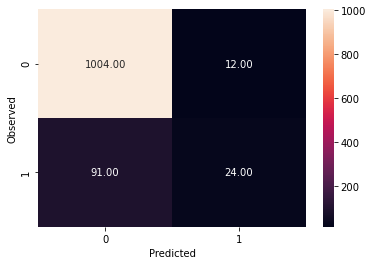

None

Recall: 0.20869565217391303

Precision: 0.6666666666666666

F1 Score: 0.3178807947019867

Roc Auc Score: 0.5984423142759329


In [335]:
print('Confusion Matrix')
print(draw_cm(y_test,pred_AB))
print()
print("Recall:",recall_score(y_test,pred_AB))
print()
print("Precision:",precision_score(y_test,pred_AB))
print()
print("F1 Score:",f1_score(y_test,pred_AB))
print()
print("Roc Auc Score:",roc_auc_score(y_test,pred_AB))

### Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [336]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state=100)
gbcl = gbcl.fit(X_train, y_train)

In [337]:
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [338]:
gbcl.score(X_train, y_train)

0.9286135693215339

In [339]:
gbcl.score(X_test, y_test)

0.9098143236074271

In [340]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': acc_GB,'recall': recall_score(y_test,pred_GB),'precision': precision_score(y_test,pred_GB),'f1': f1_score(y_test,pred_GB),'ROC': roc_auc_score(y_test,pred_GB)})
resultsDf=pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','recall','precision','f1','ROC']]
resultsDf

,Method,accuracy,recall,precision,f1,ROC
0,Logistic Regression,0.907162,0.208696,0.631579,0.313725,0.597458
0,Decision Tree,0.916888,0.330435,0.690909,0.447059,0.656851
0,Bagging Classifier,0.911583,0.365217,0.608696,0.456522,0.669321
0,Extra tree classifier,0.908930,0.130435,0.833333,0.225564,0.563741
0,AdaBoost,0.908930,0.208696,0.666667,0.317881,0.598442
0,Gradient Boost,0.909814,0.330435,0.603175,0.426966,0.652914


Confusion Matrix


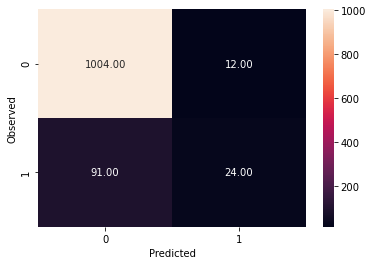

None

Recall: 0.33043478260869563

Precision: 0.6031746031746031

F1 Score: 0.42696629213483145

Roc Auc Score: 0.6529142416980486


In [341]:
print('Confusion Matrix')
print(draw_cm(y_test,pred_AB))
print()
print("Recall:",recall_score(y_test,pred_GB))
print()
print("Precision:",precision_score(y_test,pred_GB))
print()
print("F1 Score:",f1_score(y_test,pred_GB))
print()
print("Roc Auc Score:",roc_auc_score(y_test,pred_GB))

### Apply xg Classifier Algorithm for the same data and print the accuracy

In [342]:
# pip install xgboost

In [343]:
import xgboost
xgb_reg = xgboost.XGBClassifier(max_depth=3)
xgb_reg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [344]:
xgb_reg.score(X_train, y_train)

0.9383480825958702

In [345]:
xgb_reg.score(X_test, y_test)

0.8974358974358975

In [346]:
pred_XGB = xgb_reg.predict(X_test)

In [347]:
acc_XGB = accuracy_score(y_test, pred_XGB)
acc_XGB

0.8974358974358975

In [348]:
tempResultsDf = pd.DataFrame({'Method':['XG Boost'], 'accuracy': acc_XGB,'recall': recall_score(y_test,pred_XGB),'precision': precision_score(y_test,pred_XGB),'f1': f1_score(y_test,pred_XGB),'ROC': roc_auc_score(y_test,pred_XGB)})
resultsDf=pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','recall','precision','f1','ROC']]
resultsDf


,Method,accuracy,recall,precision,f1,ROC
0,Logistic Regression,0.907162,0.208696,0.631579,0.313725,0.597458
0,Decision Tree,0.916888,0.330435,0.690909,0.447059,0.656851
0,Bagging Classifier,0.911583,0.365217,0.608696,0.456522,0.669321
0,Extra tree classifier,0.908930,0.130435,0.833333,0.225564,0.563741
0,AdaBoost,0.908930,0.208696,0.666667,0.317881,0.598442
0,Gradient Boost,0.909814,0.330435,0.603175,0.426966,0.652914
0,XG Boost,0.897436,0.313043,0.493151,0.382979,0.638313


Confusion Matrix


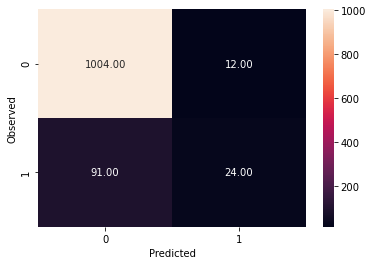

None

Recall: 0.3130434782608696

Precision: 0.4931506849315068

F1 Score: 0.3829787234042554

Roc Auc Score: 0.6383130777131119


In [349]:
print('Confusion Matrix')
print(draw_cm(y_test,pred_AB))
print()
print("Recall:",recall_score(y_test,pred_XGB))
print()
print("Precision:",precision_score(y_test,pred_XGB))
print()
print("F1 Score:",f1_score(y_test,pred_XGB))
print()
print("Roc Auc Score:",roc_auc_score(y_test,pred_XGB))

## Getting the best hyper parameter with Grid Search CV and then trying Randomforest 

In [350]:
from sklearn.model_selection import GridSearchCV

params = [{'n_estimators': [50,100,200], 'max_features': [2,4,6,8]},
          {'bootstrap':[False], 'n_estimators':[20,80,100], 'max_features':[2,4,6]}]
grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=100), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:   13.8s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [50, 100, 200]},
                         {'bootstrap': [False], 'max_features': [2, 4, 6],
                          'n_estimators': [20, 80, 100]}],
             verbose=1)

In [351]:
grid_search_cv.best_params_

{'max_features': 8, 'n_estimators': 100}

In [352]:
grid_search_cv.best_estimator_

RandomForestClassifier(max_features=8, random_state=100)

In [353]:
grid_search_cv.best_estimator_.score(X_train, y_train)

1.0

In [354]:
grid_search_cv.best_estimator_.score(X_test, y_test)

0.9124668435013262

In [355]:
pred_Gridsearch = grid_search_cv.predict(X_test)

In [356]:
acc_Gridsearch = accuracy_score(y_test, pred_Gridsearch)
acc_Gridsearch

0.9124668435013262

In [357]:
tempResultsDf = pd.DataFrame({'Method':['Randomforest'], 'accuracy': acc_Gridsearch,'recall': recall_score(y_test,pred_Gridsearch),'precision': precision_score(y_test,pred_Gridsearch),'f1': f1_score(y_test,pred_Gridsearch),'ROC': roc_auc_score(y_test,pred_Gridsearch)})
resultsDf=pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','recall','precision','f1','ROC']]
resultsDf



,Method,accuracy,recall,precision,f1,ROC
0,Logistic Regression,0.907162,0.208696,0.631579,0.313725,0.597458
0,Decision Tree,0.916888,0.330435,0.690909,0.447059,0.656851
0,Bagging Classifier,0.911583,0.365217,0.608696,0.456522,0.669321
0,Extra tree classifier,0.908930,0.130435,0.833333,0.225564,0.563741
0,AdaBoost,0.908930,0.208696,0.666667,0.317881,0.598442
0,Gradient Boost,0.909814,0.330435,0.603175,0.426966,0.652914
0,XG Boost,0.897436,0.313043,0.493151,0.382979,0.638313
0,Randomforest,0.912467,0.243478,0.700000,0.361290,0.615834


## Based on the above Bagging classifier is the best model with High accuracy , recall . precision , f1 and ROC curve  . 